<a href="https://colab.research.google.com/github/shaikmahammadrizwan/Online-payment-fraud-detection/blob/main/Online_Payment_Fraud_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online Payments Fraud Detection with Machine Learning





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv('/content/onlinefraud.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


Shape: (219765, 11)
Missing values: step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64
Fraud distribution:
isFraud
0.0    0.999295
1.0    0.000705
Name: proportion, dtype: float64


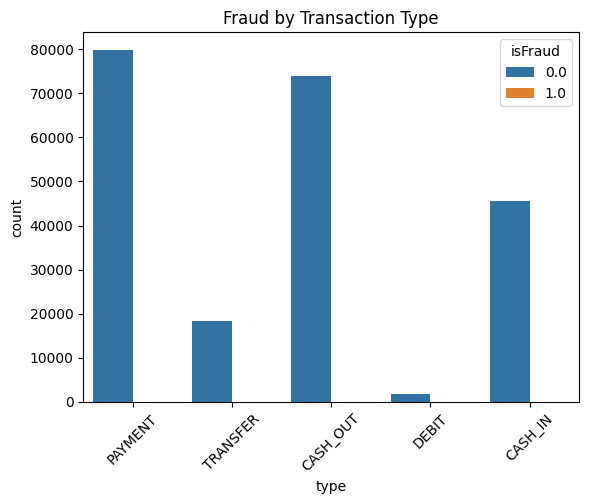

In [ ]:
print("Shape:", df.shape)
print("Missing values:", df.isna().sum())
print("Fraud distribution:")
print(df['isFraud'].value_counts(normalize=True))

sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud by Transaction Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, errors='ignore')

# Encode 'type'
df['type'] = LabelEncoder().fit_transform(df['type'])

X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [ ]:
# Drop rows where 'isFraud' is NaN
df = df.dropna(subset=['isFraud'])

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9995753071439405
Precision: 0.9523809523809523
Recall: 0.425531914893617
Confusion Matrix:
 [[65882     1]
 [   27    20]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65883
         1.0       0.95      0.43      0.59        47

    accuracy                           1.00     65930
   macro avg       0.98      0.71      0.79     65930
weighted avg       1.00      1.00      1.00     65930



In [ ]:
!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

clf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sm.fit(X_res, y_res)

y_pred_sm = clf_sm.predict(X_test)

print("SMOTE Precision:", precision_score(y_test, y_pred_sm))
print("SMOTE Recall:", recall_score(y_test, y_pred_sm))
print("SMOTE Accuracy:", accuracy_score(y_test, y_pred_sm))


SMOTE Precision: 0.24528301886792453
SMOTE Recall: 0.5531914893617021
SMOTE Accuracy: 0.9984680721977855
